# Model de predictie multiparametru

Modelul nostru citeste un fisier Excel si imparte datele de intrare in elemente de intrare si elemente de iesire. Elementele de intrare au 24 de caracteristici pe care le urmeaza.

In [1]:
import pandas as pd
df = pd.read_excel(r'Copy of Extraction PT4 14x59 din 2016 pana in prezent - analysis S1928 (003).xlsx', sheet_name='TL4 -40 Nm' )
dataset = df.values

X = dataset[1:,23:47]
Y = dataset[1:,14]
X = X.astype('float')
Y = Y.astype('float')
print("X:  %s, Y: %s" % (X.shape, Y.shape))

X:  (918, 24), Y: (918,)


In [2]:
Xdf = pd.DataFrame(X)
Ydf = pd.DataFrame(Y)
Xdf.drop(22, axis=1,inplace=True)
Xdf[24] = Ydf[0]
Ydf.plot()
Xdf.dropna(inplace=True)
td = Xdf.values
X = td[0:, :-1]
Y = td[0:, -1:]
X = X.astype('float')
Y = Y.astype('float')
print(X.shape, Y.shape)

(911, 23) (911, 1)


### Normalizarea datelor
Este necesara extragerea din dataset a valorilor de intrare care au valoare NaN.
De asemenea, am ignorat parametrii care nu varieaza in dataset.

In [3]:
X.shape, Y.shape

((911, 23), (911, 1))

## Scalam datele de intrare si de iesire intre valorile 0 si 1
pentru aceasta apelam la minmaxscaller din pachetul scipy

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scaler = preprocessing.MinMaxScaler()
Y_scale = Y_scaler.fit_transform(Y)

X_scale.shape, Y_scale.shape

((911, 23), (911, 1))

## Impartim datele in data de training si date de test


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)

(637, 23)
(137, 23)
(137, 23)
(637, 1)
(137, 1)


## Cream modelul ML
1 strat de intrare de dimensiunea dictata de numarul de parametrii folositi (22)

1 strat ascuns dim 77 folosind modelul de activare ReLU

1 strat ascuns dim 77 folosind modelul de activare ReLU

1 strat de iesire dim 1 folosind un model de activare de tip sigmoid



In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
model = Sequential([
    Dense(32, activation='tanh', kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.01), input_shape=(23,)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])
opt = Adam(lr=1e-3, decay=1e-3 / 200)


#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='hinge')
#model.compile(optimizer='rmsprop', loss='hinge')

#model.compile(optimizer='Adadelta', loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='hinge', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
#, metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
# model.compile(optimizer='rmsprop', loss="mean_absolute_percentage_error")
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Using TensorFlow backend.
W0916 23:54:55.723056 11496 deprecation_wrapper.py:119] From C:\Users\Alecs\Anaconda3\envs\CChirita\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 23:54:55.802073 11496 deprecation_wrapper.py:119] From C:\Users\Alecs\Anaconda3\envs\CChirita\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 23:54:55.807007 11496 deprecation_wrapper.py:119] From C:\Users\Alecs\Anaconda3\envs\CChirita\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 23:54:55.862063 11496 deprecation_wrapper.py:119] From C:\Users\Alecs\Anaconda3\envs\CChirita\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1

Train on 637 samples, validate on 137 samples
Epoch 1/100
637/637 [==============================] - 6s 9ms/step - loss: 5.6896 - acc: 0.0016 - val_loss: 4.8789 - val_acc: 0.0000e+00
Epoch 2/100
637/637 [==============================] - ETA: 0s - loss: 4.4096 - acc: 0.0021    - 0s 392us/step - loss: 4.2590 - acc: 0.0016 - val_loss: 3.6220 - val_acc: 0.0000e+00
Epoch 3/100
637/637 [==============================] - 0s 350us/step - loss: 3.1485 - acc: 0.0016 - val_loss: 2.6654 - val_acc: 0.0000e+00
Epoch 4/100
637/637 [==============================] - 0s 359us/step - loss: 2.3093 - acc: 0.0016 - val_loss: 1.9472 - val_acc: 0.0000e+00
Epoch 5/100
637/637 [==============================] - 0s 356us/step - loss: 1.6821 - acc: 0.0016 - val_loss: 1.4123 - val_acc: 0.0000e+00
Epoch 6/100
637/637 [==============================] - 0s 356us/step - loss: 1.2165 - acc: 0.0016 - val_loss: 1.0172 - val_acc: 0.0000e+00
Epoch 7/100
637/637 [==============================] - 0s 353us/step - loss: 0.8

Epoch 59/100
637/637 [==============================] - 0s 358us/step - loss: 0.0410 - acc: 0.0016 - val_loss: 0.0397 - val_acc: 0.0000e+00
Epoch 60/100
637/637 [==============================] - 0s 370us/step - loss: 0.0410 - acc: 0.0016 - val_loss: 0.0398 - val_acc: 0.0000e+00
Epoch 61/100
637/637 [==============================] - 0s 370us/step - loss: 0.0410 - acc: 0.0016 - val_loss: 0.0397 - val_acc: 0.0000e+00
Epoch 62/100
637/637 [==============================] - 0s 364us/step - loss: 0.0410 - acc: 0.0016 - val_loss: 0.0398 - val_acc: 0.0000e+00
Epoch 63/100
637/637 [==============================] - 0s 376us/step - loss: 0.0410 - acc: 0.0016 - val_loss: 0.0398 - val_acc: 0.0000e+00
Epoch 64/100
637/637 [==============================] - 0s 355us/step - loss: 0.0410 - acc: 0.0016 - val_loss: 0.0398 - val_acc: 0.0000e+00
Epoch 65/100
637/637 [==============================] - 0s 372us/step - loss: 0.0410 - acc: 0.0016 - val_loss: 0.0397 - val_acc: 0.0000e+00
Epoch 66/100
637/637

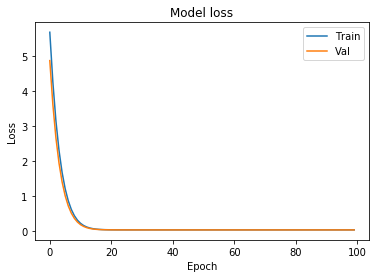

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [11]:
import numpy as np
for i in range(100):
#    pass
#    p = model.predict_on_batch(X_test[i].reshape(1, 23))
    p = model.predict(X_test[i].reshape(1,23))
    print(p,Y_scaler.inverse_transform(np.array(Y_test[i]).reshape(-1,1)), Y_scaler.inverse_transform(p))


[[0.57518584]] [[5.55]] [[9.928532]]
[[0.57518584]] [[7.26]] [[9.928532]]
[[0.57518584]] [[3.48]] [[9.928532]]
[[0.57518584]] [[4.14]] [[9.928532]]
[[0.57518584]] [[6.99]] [[9.928532]]
[[0.57518584]] [[8.84]] [[9.928532]]
[[0.57518584]] [[4.41]] [[9.928532]]
[[0.57518584]] [[7.89]] [[9.928532]]
[[0.57518584]] [[7.57]] [[9.928532]]
[[0.57518584]] [[7.49]] [[9.928532]]
[[0.57518584]] [[11.36]] [[9.928532]]
[[0.57518584]] [[12.12]] [[9.928532]]
[[0.57518584]] [[10.3]] [[9.928532]]
[[0.57518584]] [[2.]] [[9.928532]]
[[0.57518584]] [[12.52]] [[9.928532]]
[[0.57518584]] [[10.95]] [[9.928532]]
[[0.57518584]] [[11.52]] [[9.928532]]
[[0.57518584]] [[12.45]] [[9.928532]]
[[0.57518584]] [[11.]] [[9.928532]]
[[0.57518584]] [[13.13]] [[9.928532]]
[[0.57518584]] [[7.51]] [[9.928532]]
[[0.57518584]] [[15.8]] [[9.928532]]
[[0.57518584]] [[13.71]] [[9.928532]]
[[0.57518584]] [[13.43]] [[9.928532]]
[[0.57518584]] [[15.]] [[9.928532]]
[[0.57518584]] [[14.]] [[9.928532]]
[[0.57518584]] [[4.]] [[9.928532]]

In [20]:
model.evaluate(X_train, Y_train)

637/637 [==============================] - 0s 83us/step


[0.040898688634626534, 0.0015698587127158557]

In [21]:
model.predict(X_train[0].reshape(1, 23)),Y_train[0], Y_scaler.inverse_transform(model.predict(X_train[0].reshape(1, 23)))

(array([[0.57518584]], dtype=float32),
 array([0.94473684]),
 array([[9.928532]], dtype=float32))

In [22]:
model.evaluate(X_val, Y_val)

137/137 [==============================] - 0s 124us/step


[0.03970077081862157, 0.0]